<a href="https://colab.research.google.com/github/ajeetsandela/Home-Loan-Sanction-Prediction/blob/main/Home_Loan_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import dataset from Local to Google Colab
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [3]:
#Storig dataset into dataframe and finding its shape
import pandas as panda
import io
loan_training_dataset=panda.read_csv(io.BytesIO(uploaded['train.csv']))
loan_training_dataset.shape

(30000, 24)

In [4]:
#Retrieve Dataset Columns 
loan_training_dataset.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [5]:
#Replace spaces in the column name  with the underscore
loan_training_dataset.columns=loan_training_dataset.columns.str.replace(' ','_')
#Fetch the updated column names
loan_training_dataset.columns

Index(['Customer_ID', 'Name', 'Gender', 'Age', 'Income_(USD)',
       'Income_Stability', 'Profession', 'Type_of_Employment', 'Location',
       'Loan_Amount_Request_(USD)', 'Current_Loan_Expenses_(USD)',
       'Expense_Type_1', 'Expense_Type_2', 'Dependents', 'Credit_Score',
       'No._of_Defaults', 'Has_Active_Credit_Card', 'Property_ID',
       'Property_Age', 'Property_Type', 'Property_Location', 'Co-Applicant',
       'Property_Price', 'Loan_Sanction_Amount_(USD)'],
      dtype='object')

In [6]:
#Retrieve first five rows of the dataset
loan_training_dataset.head()

,Customer_ID,Name,Gender,Age,Income_(USD),Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request_(USD),Current_Loan_Expenses_(USD),Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount_(USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


 **`Detecting,Analyzing and Treating Missing Values`**

In [8]:
#Finding the number of null values in each column
loan_training_dataset.isnull().sum()

Customer_ID                       0
Name                              0
Gender                           53
Age                               0
Income_(USD)                   4576
Income_Stability               1683
Profession                        0
Type_of_Employment             7270
Location                          0
Loan_Amount_Request_(USD)         0
Current_Loan_Expenses_(USD)     172
Expense_Type_1                    0
Expense_Type_2                    0
Dependents                     2493
Credit_Score                   1703
No._of_Defaults                   0
Has_Active_Credit_Card         1566
Property_ID                       0
Property_Age                   4850
Property_Type                     0
Property_Location               356
Co-Applicant                      0
Property_Price                    0
Loan_Sanction_Amount_(USD)      340
dtype: int64

In [10]:
#Finding the percentage of missingness
loan_training_dataset.isnull().mean()*100

Customer_ID                     0.000000
Name                            0.000000
Gender                          0.176667
Age                             0.000000
Income_(USD)                   15.253333
Income_Stability                5.610000
Profession                      0.000000
Type_of_Employment             24.233333
Location                        0.000000
Loan_Amount_Request_(USD)       0.000000
Current_Loan_Expenses_(USD)     0.573333
Expense_Type_1                  0.000000
Expense_Type_2                  0.000000
Dependents                      8.310000
Credit_Score                    5.676667
No._of_Defaults                 0.000000
Has_Active_Credit_Card          5.220000
Property_ID                     0.000000
Property_Age                   16.166667
Property_Type                   0.000000
Property_Location               1.186667
Co-Applicant                    0.000000
Property_Price                  0.000000
Loan_Sanction_Amount_(USD)      1.133333
dtype: float64

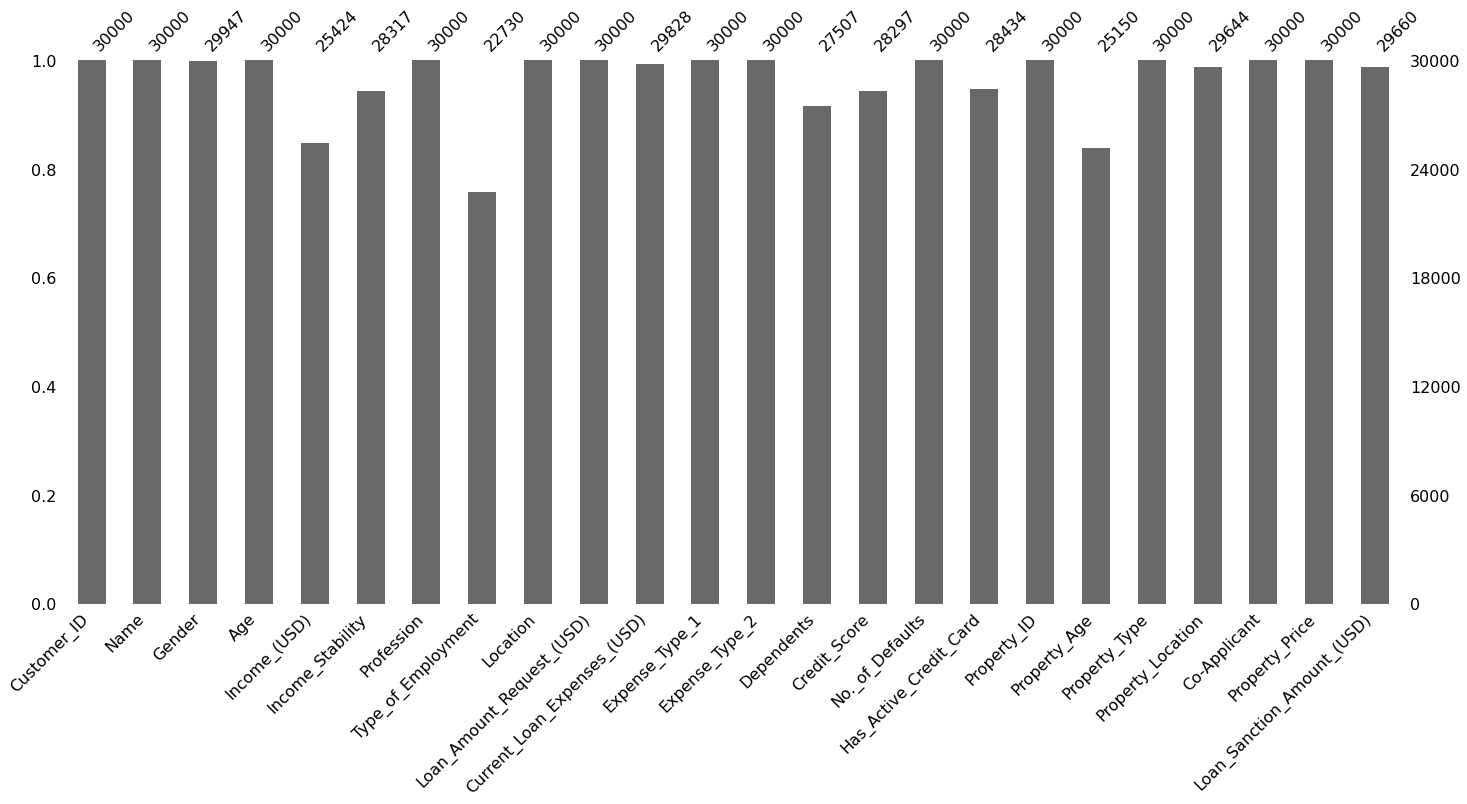

In [11]:
#Visualization of missingness using missingno package 
import missingno as msno
msno.bar(loan_training_dataset)

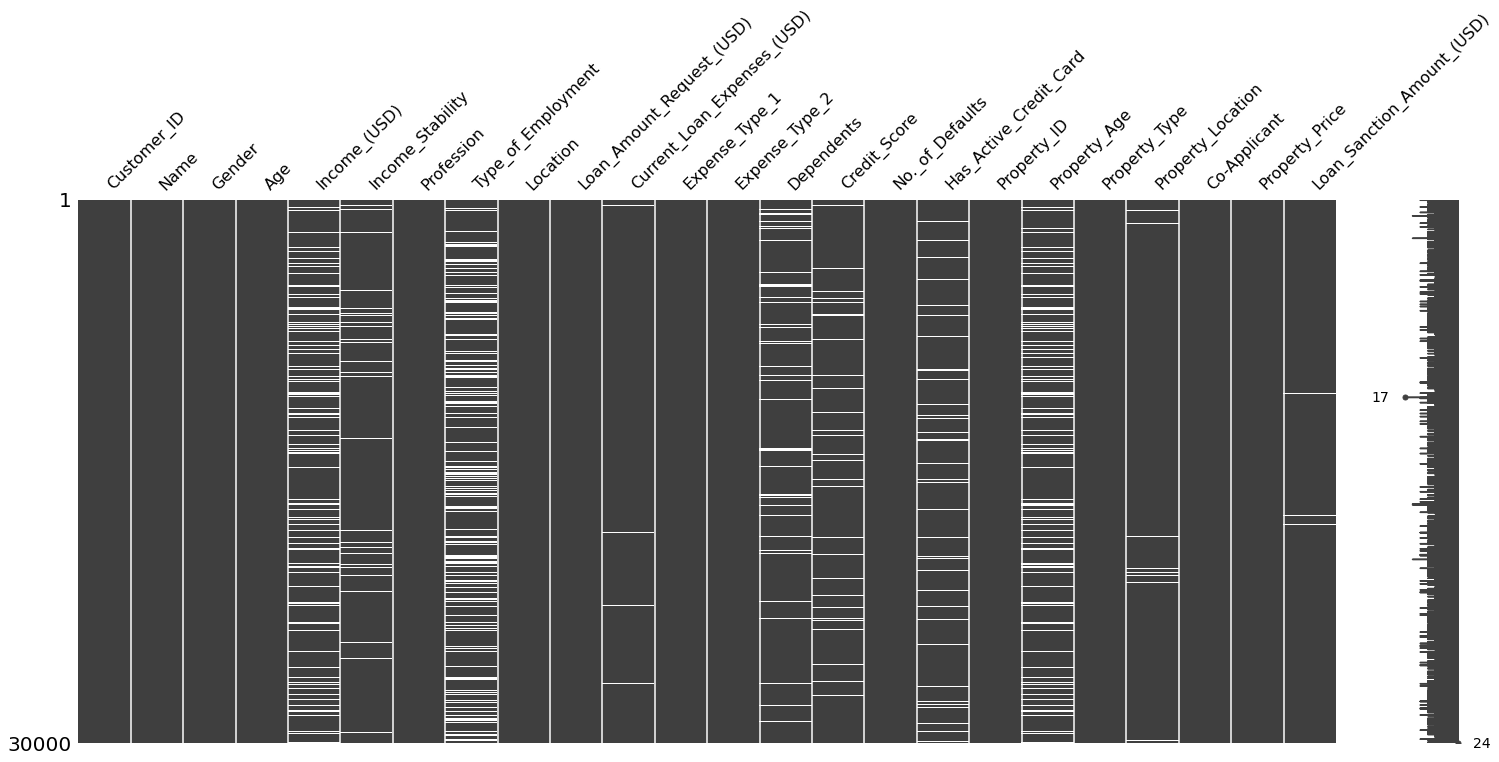

In [12]:
#Nullity Matrix 
msno.matrix(loan_training_dataset)
#Observations
#-->From spark line we can observe that 17 columns have minimum nullity and remaining 7 columns have maximum nullity out of all 24 columns

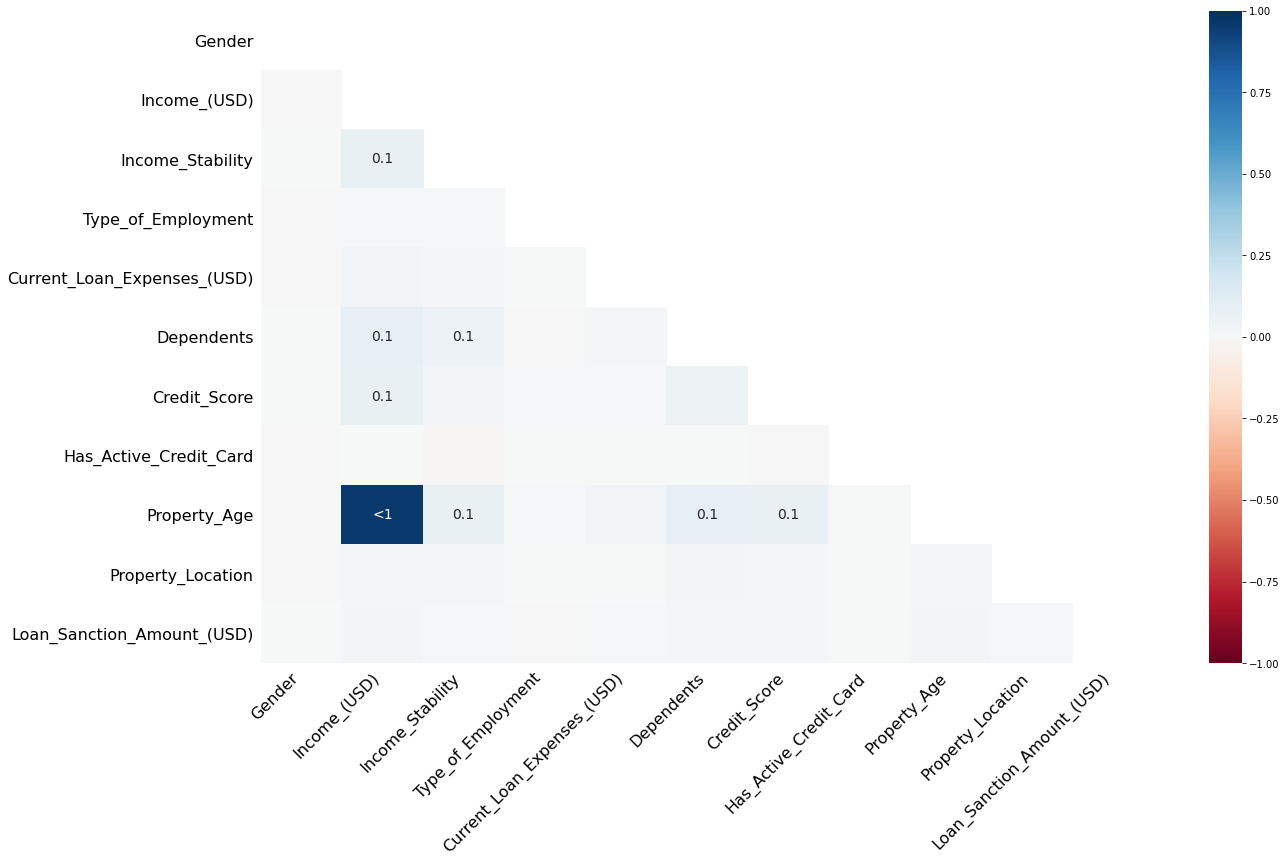

In [13]:
#Finding whether missingness have some pattern or not?
#-->Finding correlation between the columns
msno.heatmap(loan_training_dataset)
#Observations
#We are plotting heatmap to show the nullity correlation between the various columns
#-->Property_Age and Income(USD) have stronger correlation means if a value in one column missing then there is high chance of missing in another column as well
#-->Strength of Correlaltion with 0.1 has weaker relationship so value missing in one variable is very less likely to miss in another column
#-->Strength of Correlation with 0.00 states that there is no relationship or any kind of pattern of missingess between the columns
#Understanding and Next steps:
#columns with 0.00 has non linear relationship so we can ignore those columns
#columns with 0.1 has very much weak realtionship so working on these type of columns are also unimportant
#Property_Age and Income(USD) have stronger nullity relationship because of correlation coefficient(0.9 approx) 

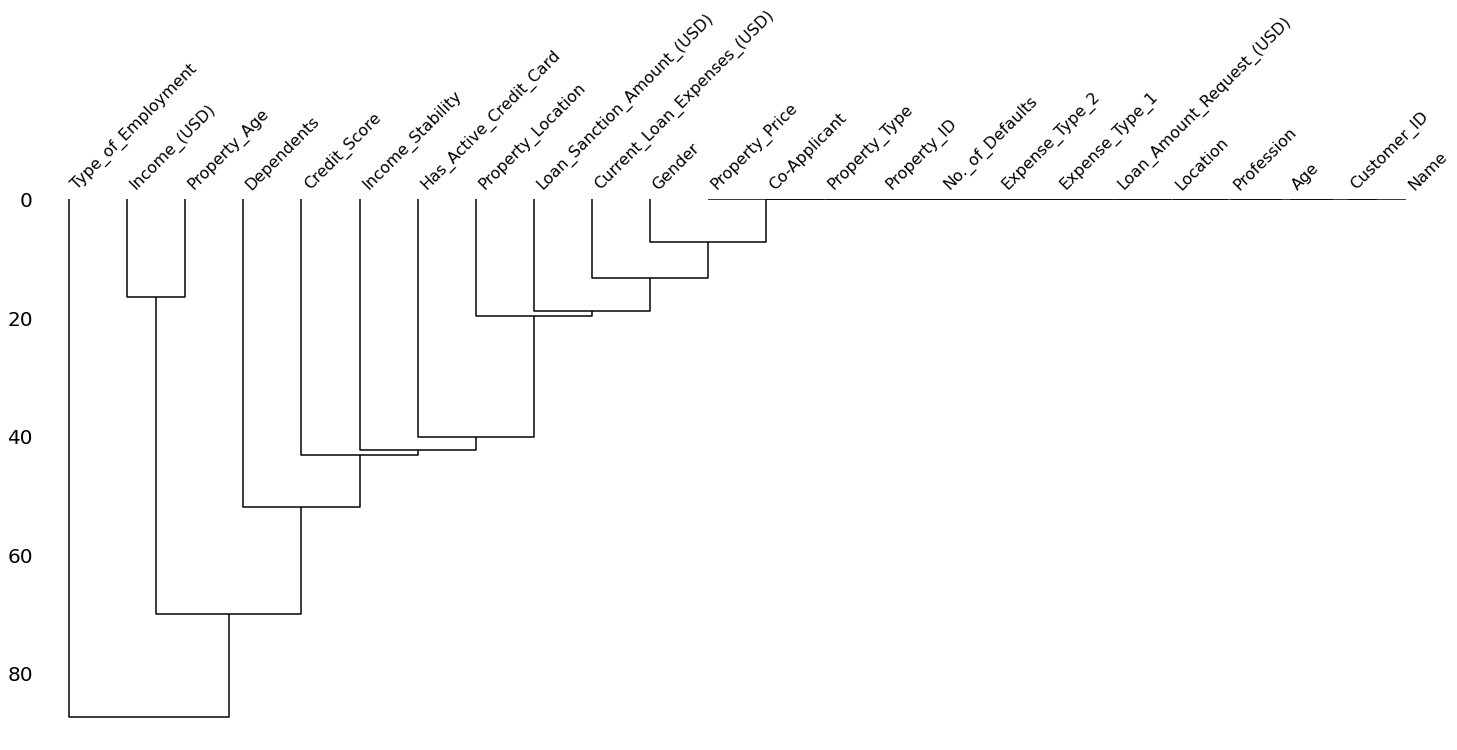

In [15]:
#Another method to analyze the missingness of a dataset
msno.dendrogram(loan_training_dataset)

In [16]:
#Now performing Deletions in the dataset
loan_training_dataset.isnull().sum()
#As we can see Gender,Current_Loan_Expenses_(USD),Property_Location,Loan_Sanction_Amount_(USD) has very less missing values so performing listwise deletions on them(Deleting complete rows)
#By deleting all null values from above columns we are deleting around 921 rows approximately out of 30000 rows which consitutes around 3%(Also they seem like missing completely at random category)
#Leaving null values which have higher count as it is(pair wise deletion)

Customer_ID                       0
Name                              0
Gender                           53
Age                               0
Income_(USD)                   4576
Income_Stability               1683
Profession                        0
Type_of_Employment             7270
Location                          0
Loan_Amount_Request_(USD)         0
Current_Loan_Expenses_(USD)     172
Expense_Type_1                    0
Expense_Type_2                    0
Dependents                     2493
Credit_Score                   1703
No._of_Defaults                   0
Has_Active_Credit_Card         1566
Property_ID                       0
Property_Age                   4850
Property_Type                     0
Property_Location               356
Co-Applicant                      0
Property_Price                    0
Loan_Sanction_Amount_(USD)      340
dtype: int64

In [17]:
#Performing lsit wise deletion operation on the above mentioned columns
loan_training_dataset.dropna(subset=["Gender","Current_Loan_Expenses_(USD)","Property_Location","Loan_Sanction_Amount_(USD)"],how="any",inplace=True)

In [18]:
#Checking whether missing value rows have been deleted or not
loan_training_dataset.isnull().sum()

Customer_ID                       0
Name                              0
Gender                            0
Age                               0
Income_(USD)                   4358
Income_Stability               1601
Profession                        0
Type_of_Employment             7047
Location                          0
Loan_Amount_Request_(USD)         0
Current_Loan_Expenses_(USD)       0
Expense_Type_1                    0
Expense_Type_2                    0
Dependents                     2368
Credit_Score                   1621
No._of_Defaults                   0
Has_Active_Credit_Card         1512
Property_ID                       0
Property_Age                   4614
Property_Type                     0
Property_Location                 0
Co-Applicant                      0
Property_Price                    0
Loan_Sanction_Amount_(USD)        0
dtype: int64

In [19]:
#shape of dataset
loan_training_dataset.shape

(29097, 24)

In [20]:
#dropping all missing value rows for the baseline case
loan_training_dataset_complete_case=loan_training_dataset.copy(deep=True)
loan_training_dataset_complete_case.dropna(subset=["Income_(USD)","Income_Stability","Type_of_Employment","Dependents","Credit_Score","Credit_Score","Has_Active_Credit_Card","Property_Age"],how="any",inplace=True)

In [21]:
#checking whether the base line is up to the mark or not
loan_training_dataset_complete_case.isnull().sum()

Customer_ID                    0
Name                           0
Gender                         0
Age                            0
Income_(USD)                   0
Income_Stability               0
Profession                     0
Type_of_Employment             0
Location                       0
Loan_Amount_Request_(USD)      0
Current_Loan_Expenses_(USD)    0
Expense_Type_1                 0
Expense_Type_2                 0
Dependents                     0
Credit_Score                   0
No._of_Defaults                0
Has_Active_Credit_Card         0
Property_ID                    0
Property_Age                   0
Property_Type                  0
Property_Location              0
Co-Applicant                   0
Property_Price                 0
Loan_Sanction_Amount_(USD)     0
dtype: int64

In [22]:
loan_training_dataset.dtypes

Customer_ID                     object
Name                            object
Gender                          object
Age                              int64
Income_(USD)                   float64
Income_Stability                object
Profession                      object
Type_of_Employment              object
Location                        object
Loan_Amount_Request_(USD)      float64
Current_Loan_Expenses_(USD)    float64
Expense_Type_1                  object
Expense_Type_2                  object
Dependents                     float64
Credit_Score                   float64
No._of_Defaults                  int64
Has_Active_Credit_Card          object
Property_ID                      int64
Property_Age                   float64
Property_Type                    int64
Property_Location               object
Co-Applicant                     int64
Property_Price                 float64
Loan_Sanction_Amount_(USD)     float64
dtype: object

In [23]:
#Separating Categorical and Numerical data as different dataframes
import numpy as np
loan_training_dataset_numeric = loan_training_dataset.select_dtypes(include=[np.number])
loan_training_dataset_categorical = loan_training_dataset.select_dtypes(exclude=[np.number])

In [24]:
loan_training_dataset_categorical

,Customer_ID,Name,Gender,Income_Stability,Profession,Type_of_Employment,Location,Expense_Type_1,Expense_Type_2,Has_Active_Credit_Card,Property_Location
0,C-36995,Frederica Shealy,F,Low,Working,Sales staff,Semi-Urban,N,N,NaN,Rural
1,C-33999,America Calderone,M,Low,Working,NaN,Semi-Urban,N,Y,Unpossessed,Rural
2,C-3770,Rosetta Verne,F,High,Pensioner,NaN,Semi-Urban,N,Y,Unpossessed,Urban
3,C-26480,Zoe Chitty,F,High,Pensioner,NaN,Rural,N,Y,Unpossessed,Semi-Urban
4,C-23459,Afton Venema,F,Low,Working,High skill tech staff,Semi-Urban,N,Y,Active,Semi-Urban
...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,Low,Commercial associate,Managers,Urban,Y,Y,Unpossessed,Urban
29996,C-32511,Silas Slaugh,M,Low,Working,Laborers,Semi-Urban,N,N,Inactive,Urban
29997,C-5192,Carmelo Lone,F,Low,Working,Sales staff,Urban,N,Y,Active,Rural
29998,C-12172,Carolann Osby,M,Low,Working,Security staff,Semi-Urban,N,Y,Unpossessed,Urban


In [25]:
loan_training_dataset_numeric

,Age,Income_(USD),Loan_Amount_Request_(USD),Current_Loan_Expenses_(USD),Dependents,Credit_Score,No._of_Defaults,Property_ID,Property_Age,Property_Type,Co-Applicant,Property_Price,Loan_Sanction_Amount_(USD)
0,56,1933.05,72809.58,241.08,3.0,809.44,0,746,1933.05,4,1,119933.46,54607.18
1,32,4952.91,46837.47,495.81,1.0,780.40,0,608,4952.91,2,1,54791.00,37469.98
2,65,988.19,45593.04,171.95,1.0,833.15,0,546,988.19,2,0,72440.58,36474.43
3,65,NaN,80057.92,298.54,2.0,832.70,1,890,NaN,2,1,121441.51,56040.54
4,31,2614.77,113858.89,491.41,NaN,745.55,1,715,2614.77,4,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,38,4969.41,76657.90,722.34,2.0,869.61,0,566,4969.41,4,1,111096.56,68992.11
29996,20,1606.88,66595.14,253.04,3.0,729.41,0,175,1606.88,3,1,73453.94,46616.60
29997,49,NaN,81410.08,583.11,NaN,NaN,0,959,NaN,1,1,102108.02,61057.56
29998,38,2417.71,142524.10,378.29,3.0,677.27,1,375,2417.71,4,1,168194.47,99766.87


In [26]:
#Now dealing with Numeric data and performing isnull().sum()
loan_training_dataset_numeric.isnull().sum()

Age                               0
Income_(USD)                   4358
Loan_Amount_Request_(USD)         0
Current_Loan_Expenses_(USD)       0
Dependents                     2368
Credit_Score                   1621
No._of_Defaults                   0
Property_ID                       0
Property_Age                   4614
Property_Type                     0
Co-Applicant                      0
Property_Price                    0
Loan_Sanction_Amount_(USD)        0
dtype: int64

In [27]:
#Now dealing with Categorical  data and performing isnull().sum()
loan_training_dataset_categorical.isnull().sum()

Customer_ID                  0
Name                         0
Gender                       0
Income_Stability          1601
Profession                   0
Type_of_Employment        7047
Location                     0
Expense_Type_1               0
Expense_Type_2               0
Has_Active_Credit_Card    1512
Property_Location            0
dtype: int64

/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


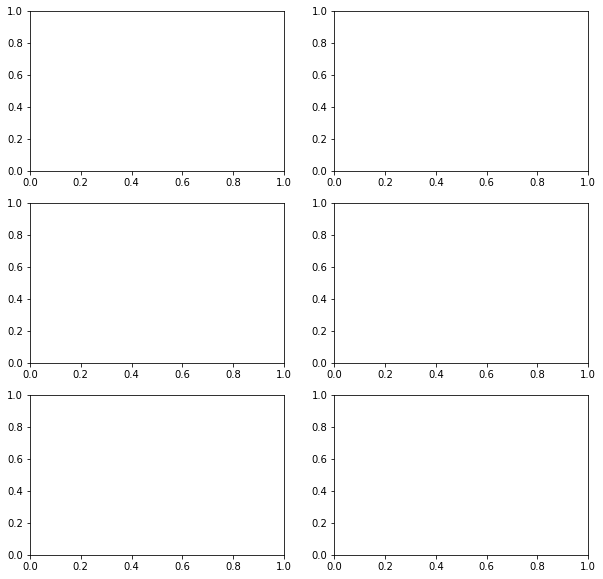

In [28]:
#Imputing the missing values in the dataset using mean,median and mode methods
from matplotlib import pyplot as plt

# Make a copy of loan_training dataset Numerical & Categorical

#Mean,Median,Mode and Constant imputer
loan_training_dataset_test = loan_training_dataset_numeric.copy(deep=True)
loan_training_dataset_mean = loan_training_dataset_numeric.copy(deep=True)
loan_training_dataset_median = loan_training_dataset_numeric.copy(deep=True)


#Mode and Constant imputation for Categorical
loan_training_dataset__categorical_mode = loan_training_dataset_categorical.copy(deep=True)
loan_training_dataset_categorical_constant = loan_training_dataset_categorical.copy(deep=True)


#import SimpleImputer from sklearn
from sklearn.impute import SimpleImputer

# Create  imputer object for each kind of imputation
#Numerical
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

#Categorical
categorical_mode_imputer = SimpleImputer(strategy='most_frequent')
categorical_constant_imputer = SimpleImputer(strategy='constant',fill_value=0)

# Impute respective imputation values in the respective dataframes 
loan_training_dataset_mean.iloc[:, :] = mean_imputer.fit_transform(loan_training_dataset_mean)
loan_training_dataset_median.iloc[:, :] = median_imputer.fit_transform(loan_training_dataset_median)

#impuation of categorical
loan_training_dataset__categorical_mode.iloc[:, :] = categorical_mode_imputer.fit_transform(loan_training_dataset__categorical_mode)
loan_training_dataset_categorical_constant.iloc[:, :] = categorical_constant_imputer.fit_transform(loan_training_dataset_categorical_constant)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
nullity = loan_training_dataset.Credit_Score.isnull()+loan_training_dataset.Property_Age.isnull()

# Create a dictionary of imputations
imputations = {'Mean':loan_training_dataset_mean,'Median':loan_training_dataset_median,
               'Categorical mode':loan_training_dataset__categorical_mode,'Categorical Constant':loan_training_dataset_categorical_constant}

# Loop over flattened axes and imputations
#for ax, df_key in zip(axes.flatten(),imputations):
    # Select and also set the title for a DataFrame
 #   imputations[df_key].plot(x='Income_(USD)', y='Credit_Score', kind='scatter', 
  #                        alpha=0.5, c=nullity, cmap='rainbow', ax=ax, 
   #                       colorbar=False, title=df_key)
plt.show()

In [29]:
loan_training_dataset_test.isnull().sum()

Age                               0
Income_(USD)                   4358
Loan_Amount_Request_(USD)         0
Current_Loan_Expenses_(USD)       0
Dependents                     2368
Credit_Score                   1621
No._of_Defaults                   0
Property_ID                       0
Property_Age                   4614
Property_Type                     0
Co-Applicant                      0
Property_Price                    0
Loan_Sanction_Amount_(USD)        0
dtype: int64

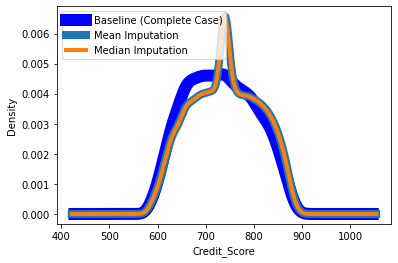

In [30]:
#credit score-mean
# Plot graphs of imputed DataFrames and the complete case
loan_training_dataset_complete_case['Credit_Score'].plot(kind='kde', c='blue', linewidth=12)
loan_training_dataset_mean['Credit_Score'].plot(kind='kde', linewidth=8)
loan_training_dataset_median['Credit_Score'].plot(kind='kde', linewidth=4)

# Create labels for the four DataFrames
labels = ['Baseline (Complete Case)', 'Mean Imputation', 'Median Imputation']
plt.legend(labels)

# Set the x-label as Skin Fold
plt.xlabel('Credit_Score')

plt.show()

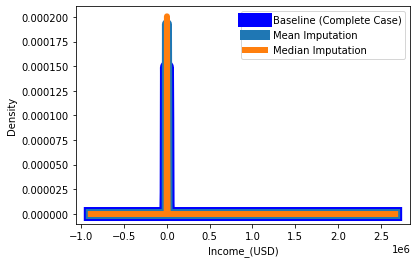

In [31]:
#Income_(USD)-Median
# Plot graphs of imputed DataFrames and the complete case
loan_training_dataset_complete_case['Income_(USD)'].plot(kind='kde', c='blue', linewidth=14)
loan_training_dataset_mean['Income_(USD)'].plot(kind='kde', linewidth=10)
loan_training_dataset_median['Income_(USD)'].plot(kind='kde', linewidth=6)

# Create labels for the four DataFrames
labels = ['Baseline (Complete Case)', 'Mean Imputation', 'Median Imputation', 'Mode Imputation']
plt.legend(labels)

# Set the x-label as Skin Fold
plt.xlabel('Income_(USD)')

plt.show()

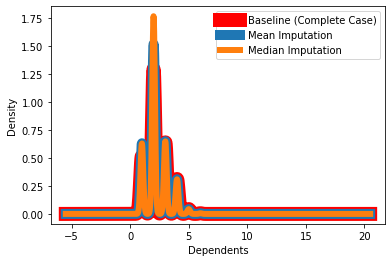

In [32]:
#Dependents-Mean
# Plot graphs of imputed DataFrames and the complete case
loan_training_dataset_complete_case['Dependents'].plot(kind='kde', c='red', linewidth=14)
loan_training_dataset_mean['Dependents'].plot(kind='kde',linewidth=10)
loan_training_dataset_median['Dependents'].plot(kind='kde',linewidth=6)

# Create labels for the four DataFrames
labels = ['Baseline (Complete Case)', 'Mean Imputation', 'Median Imputation', 'Mode Imputation']
plt.legend(labels)

# Set the x-label as Skin Fold
plt.xlabel('Dependents')

plt.show()

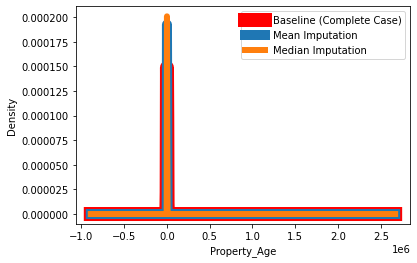

In [33]:
#Property_Age
# Plot graphs of imputed DataFrames and the complete case
loan_training_dataset_complete_case['Property_Age'].plot(kind='kde', c='red', linewidth=14)
loan_training_dataset_mean['Property_Age'].plot(kind='kde',linewidth=10)
loan_training_dataset_median['Property_Age'].plot(kind='kde',linewidth=6)

# Create labels for the four DataFrames
labels = ['Baseline (Complete Case)', 'Mean Imputation', 'Median Imputation', 'Mode Imputation']
plt.legend(labels)

# Set the x-label as Skin Fold
plt.xlabel('Property_Age')

plt.show()

In [34]:
#Assigning best chosen column from mean,median and mode to main data frame i.e, loan_training_dataset
#Numeric
loan_training_dataset['Credit_Score']=loan_training_dataset_mean['Credit_Score']
loan_training_dataset['Income_(USD)']=loan_training_dataset_median['Income_(USD)']
loan_training_dataset['Dependents']=loan_training_dataset_mean['Dependents']
loan_training_dataset['Property_Age']=loan_training_dataset_mean['Property_Age']
#Categorical
loan_training_dataset['Income_Stability']=loan_training_dataset__categorical_mode['Income_Stability']
loan_training_dataset['Type_of_Employment']=loan_training_dataset__categorical_mode['Type_of_Employment']
loan_training_dataset['Has_Active_Credit_Card']=loan_training_dataset__categorical_mode['Has_Active_Credit_Card']


In [35]:
loan_training_dataset


,Customer_ID,Name,Gender,Age,Income_(USD),Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request_(USD),Current_Loan_Expenses_(USD),Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount_(USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.000000,809.44000,0,Active,746,1933.050000,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,Laborers,Semi-Urban,46837.47,495.81,N,Y,1.000000,780.40000,0,Unpossessed,608,4952.910000,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,Laborers,Semi-Urban,45593.04,171.95,N,Y,1.000000,833.15000,0,Unpossessed,546,988.190000,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,2222.33,High,Pensioner,Laborers,Rural,80057.92,298.54,N,Y,2.000000,832.70000,1,Unpossessed,890,2630.731729,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,2.254443,745.55000,1,Active,715,2614.770000,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,722.34,Y,Y,2.000000,869.61000,0,Unpossessed,566,4969.410000,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,253.04,N,N,3.000000,729.41000,0,Inactive,175,1606.880000,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,2222.33,Low,Working,Sales staff,Urban,81410.08,583.11,N,Y,2.254443,739.84948,0,Active,959,2630.731729,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,378.29,N,Y,3.000000,677.27000,1,Unpossessed,375,2417.710000,4,Urban,1,168194.47,99766.87


In [36]:
#Finding Correlation
loan_training_dataset.corr()

,Age,Income_(USD),Loan_Amount_Request_(USD),Current_Loan_Expenses_(USD),Dependents,Credit_Score,No._of_Defaults,Property_ID,Property_Age,Property_Type,Co-Applicant,Property_Price,Loan_Sanction_Amount_(USD)
Age,1.000000,-0.009425,-0.009182,-0.022557,-0.079685,0.126234,0.005198,-0.013054,-0.009415,0.002809,0.003110,-0.009189,0.008527
Income_(USD),-0.009425,1.000000,0.045535,0.050256,0.004964,0.011569,-0.002032,-0.007597,0.999797,0.008887,0.000999,0.045973,0.033549
Loan_Amount_Request_(USD),-0.009182,0.045535,1.000000,0.685096,0.038697,0.173144,-0.002350,-0.008702,0.045125,0.003504,0.003530,0.948753,0.723960
Current_Loan_Expenses_(USD),-0.022557,0.050256,0.685096,1.000000,0.042434,0.112366,0.000743,-0.015592,0.049632,0.015783,0.003274,0.651429,0.485992
Dependents,-0.079685,0.004964,0.038697,0.042434,1.000000,-0.085176,0.008096,0.002756,0.004879,-0.009262,0.003701,0.035493,0.008193
Credit_Score,0.126234,0.011569,0.173144,0.112366,-0.085176,1.000000,0.006638,-0.005799,0.011621,0.007279,0.011058,0.165869,0.359990
No._of_Defaults,0.005198,-0.002032,-0.002350,0.000743,0.008096,0.006638,1.000000,-0.001914,-0.001871,-0.000127,-0.008651,-0.000758,-0.006429
Property_ID,-0.013054,-0.007597,-0.008702,-0.015592,0.002756,-0.005799,-0.001914,1.000000,-0.007548,0.009561,0.008666,-0.011801,-0.010061
Property_Age,-0.009415,0.999797,0.045125,0.049632,0.004879,0.011621,-0.001871,-0.007548,1.000000,0.008921,0.000687,0.045509,0.034216
Property_Type,0.002809,0.008887,0.003504,0.015783,-0.009262,0.007279,-0.000127,0.009561,0.008921,1.000000,-0.000659,0.002617,0.001054


Property age and income usd=0.999
Loan amount request and current loan expenses=0.68
Loan AMOUNT request and property price=0.9487


In [37]:
#Correlation matrix
corr_matrix=loan_training_dataset.corr()
# Create positive correlation matrix
corr_df = loan_training_dataset.corr().abs()
# Create and apply mask
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.6)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >=0.70)]

# Drop the features in the to_drop list
reduced_df = loan_training_dataset.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The reduced dataframe has 22 columns.


In [38]:
to_drop

['Income_(USD)', 'Loan_Amount_Request_(USD)']

In [39]:
#dropping columns and choosing columnn with highest correlation among them for better accuracy trying two things
loan_training_dataset_test1 = loan_training_dataset.copy(deep=True)
loan_training_dataset_test1.drop(['Property_Price','Property_Age'], axis = 1)



,Customer_ID,Name,Gender,Age,Income_(USD),Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request_(USD),Current_Loan_Expenses_(USD),Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Type,Property_Location,Co-Applicant,Loan_Sanction_Amount_(USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.000000,809.44000,0,Active,746,4,Rural,1,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,Laborers,Semi-Urban,46837.47,495.81,N,Y,1.000000,780.40000,0,Unpossessed,608,2,Rural,1,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,Laborers,Semi-Urban,45593.04,171.95,N,Y,1.000000,833.15000,0,Unpossessed,546,2,Urban,0,36474.43
3,C-26480,Zoe Chitty,F,65,2222.33,High,Pensioner,Laborers,Rural,80057.92,298.54,N,Y,2.000000,832.70000,1,Unpossessed,890,2,Semi-Urban,1,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,2.254443,745.55000,1,Active,715,4,Semi-Urban,1,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,722.34,Y,Y,2.000000,869.61000,0,Unpossessed,566,4,Urban,1,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,253.04,N,N,3.000000,729.41000,0,Inactive,175,3,Urban,1,46616.60
29997,C-5192,Carmelo Lone,F,49,2222.33,Low,Working,Sales staff,Urban,81410.08,583.11,N,Y,2.254443,739.84948,0,Active,959,1,Rural,1,61057.56
29998,C-12172,Carolann Osby,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,378.29,N,Y,3.000000,677.27000,1,Unpossessed,375,4,Urban,1,99766.87


In [40]:
loan_training_dataset_test2 = loan_training_dataset.copy(deep=True)
loan_training_dataset_test2.drop(['Income_(USD)','Loan_Amount_Request_(USD)'], axis = 1)

,Customer_ID,Name,Gender,Age,Income_Stability,Profession,Type_of_Employment,Location,Current_Loan_Expenses_(USD),Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount_(USD)
0,C-36995,Frederica Shealy,F,56,Low,Working,Sales staff,Semi-Urban,241.08,N,N,3.000000,809.44000,0,Active,746,1933.050000,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,Low,Working,Laborers,Semi-Urban,495.81,N,Y,1.000000,780.40000,0,Unpossessed,608,4952.910000,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,High,Pensioner,Laborers,Semi-Urban,171.95,N,Y,1.000000,833.15000,0,Unpossessed,546,988.190000,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,High,Pensioner,Laborers,Rural,298.54,N,Y,2.000000,832.70000,1,Unpossessed,890,2630.731729,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,Low,Working,High skill tech staff,Semi-Urban,491.41,N,Y,2.254443,745.55000,1,Active,715,2614.770000,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,Low,Commercial associate,Managers,Urban,722.34,Y,Y,2.000000,869.61000,0,Unpossessed,566,4969.410000,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,Low,Working,Laborers,Semi-Urban,253.04,N,N,3.000000,729.41000,0,Inactive,175,1606.880000,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,Low,Working,Sales staff,Urban,583.11,N,Y,2.254443,739.84948,0,Active,959,2630.731729,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,Low,Working,Security staff,Semi-Urban,378.29,N,Y,3.000000,677.27000,1,Unpossessed,375,2417.710000,4,Urban,1,168194.47,99766.87


In [42]:
#Multi Collinearity
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = panda.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
   

In [43]:
X = loan_training_dataset_test1.select_dtypes(include=[np.number]).iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Age,7.295989
1,Income_(USD),2615.229397
2,Loan_Amount_Request_(USD),35.132230
3,Current_Loan_Expenses_(USD),7.052751
4,Dependents,6.561488
5,Credit_Score,22.433101
6,No._of_Defaults,1.239803
7,Property_ID,3.939618
8,Property_Age,2622.188506
9,Property_Type,5.647068


In [44]:
#Dropping Property age as it constitutes highest VIF
loan_training_dataset_test1= loan_training_dataset_test1.drop(['Property_Age'], axis = 1)
X = loan_training_dataset_test1.select_dtypes(include=[np.number]).iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Age,7.295968
1,Income_(USD),1.062740
2,Loan_Amount_Request_(USD),35.128766
3,Current_Loan_Expenses_(USD),7.049555
4,Dependents,6.561333
5,Credit_Score,22.343889
6,No._of_Defaults,1.239708
7,Property_ID,3.939492
8,Property_Type,5.646825
9,Co-Applicant,1.004148


In [45]:
#Dropping Loan_Amount_Request_(USD) as it constitutes highest VIF next
loan_training_dataset_test1= loan_training_dataset_test1.drop(['Loan_Amount_Request_(USD)'], axis = 1)
X = loan_training_dataset_test1.select_dtypes(include=[np.number]).iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Age,7.295809
1,Income_(USD),1.062736
2,Current_Loan_Expenses_(USD),6.505396
3,Dependents,6.561195
4,Credit_Score,22.279302
5,No._of_Defaults,1.239639
6,Property_ID,3.939318
7,Property_Type,5.646434
8,Co-Applicant,1.004036
9,Property_Price,5.243422


In [46]:
#Dropping Credit_Score as it constitutes highest VIF next
loan_training_dataset_test1= loan_training_dataset_test1.drop(['Credit_Score'], axis = 1)
X = loan_training_dataset_test1.select_dtypes(include=[np.number]).iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Age,5.124330
1,Income_(USD),1.061670
2,Current_Loan_Expenses_(USD),6.309475
3,Dependents,5.225506
4,No._of_Defaults,1.230692
5,Property_ID,3.533413
6,Property_Type,4.750715
7,Co-Applicant,1.003854
8,Property_Price,5.158771


In [47]:
 X=loan_training_dataset_test1.select_dtypes(exclude=[np.number])

In [48]:
X.isnull().sum()

Customer_ID               0
Name                      0
Gender                    0
Income_Stability          0
Profession                0
Type_of_Employment        0
Location                  0
Expense_Type_1            0
Expense_Type_2            0
Has_Active_Credit_Card    0
Property_Location         0
dtype: int64

In [49]:
X

,Customer_ID,Name,Gender,Income_Stability,Profession,Type_of_Employment,Location,Expense_Type_1,Expense_Type_2,Has_Active_Credit_Card,Property_Location
0,C-36995,Frederica Shealy,F,Low,Working,Sales staff,Semi-Urban,N,N,Active,Rural
1,C-33999,America Calderone,M,Low,Working,Laborers,Semi-Urban,N,Y,Unpossessed,Rural
2,C-3770,Rosetta Verne,F,High,Pensioner,Laborers,Semi-Urban,N,Y,Unpossessed,Urban
3,C-26480,Zoe Chitty,F,High,Pensioner,Laborers,Rural,N,Y,Unpossessed,Semi-Urban
4,C-23459,Afton Venema,F,Low,Working,High skill tech staff,Semi-Urban,N,Y,Active,Semi-Urban
...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,Low,Commercial associate,Managers,Urban,Y,Y,Unpossessed,Urban
29996,C-32511,Silas Slaugh,M,Low,Working,Laborers,Semi-Urban,N,N,Inactive,Urban
29997,C-5192,Carmelo Lone,F,Low,Working,Sales staff,Urban,N,Y,Active,Rural
29998,C-12172,Carolann Osby,M,Low,Working,Security staff,Semi-Urban,N,Y,Unpossessed,Urban


In [50]:
crosstab = panda.crosstab(loan_training_dataset_test1["Gender"], loan_training_dataset_test1["Has_Active_Credit_Card"])
crosstab

Has_Active_Credit_Card,Active,Inactive,Unpossessed
Gender,,,
F,5526,4557,4381
M,5460,4627,4546


In [51]:

import scipy.stats as stats

stats.chi2_contingency(crosstab)


(2.9983002711698,
 0.22331987113436513,
 2,
 array([[5461.09578307, 4565.32893425, 4437.57528268],
        [5524.90421693, 4618.67106575, 4489.42471732]]))

In [52]:
#Perform one way Anova

import statsmodels.api as sm
from statsmodels.formula.api import ols
loan_training_dataset_test1= loan_training_dataset_test1.rename(columns = {"Loan_Sanction_Amount_(USD)":"Loan_Sanction_Amount"})

mod1=ols('Loan_Sanction_Amount~Gender',data=loan_training_dataset_test1).fit()
mod2=ols('Loan_Sanction_Amount~Income_Stability',data=loan_training_dataset_test1).fit()
mod3=ols('Loan_Sanction_Amount~Profession',data=loan_training_dataset_test1).fit()
mod4=ols('Loan_Sanction_Amount~Type_of_Employment',data=loan_training_dataset_test1).fit()
mod5=ols('Loan_Sanction_Amount~Location',data=loan_training_dataset_test1).fit()
mod6=ols('Loan_Sanction_Amount~Expense_Type_1',data=loan_training_dataset_test1).fit()
mod7=ols('Loan_Sanction_Amount~Expense_Type_2',data=loan_training_dataset_test1).fit()
mod8=ols('Loan_Sanction_Amount~Has_Active_Credit_Card',data=loan_training_dataset_test1).fit()
mod9=ols('Loan_Sanction_Amount~Property_Location',data=loan_training_dataset_test1).fit()

aov1=sm.stats.anova_lm(mod1,type=2)
aov2=sm.stats.anova_lm(mod2,type=2)
aov3=sm.stats.anova_lm(mod3,type=2)
aov4=sm.stats.anova_lm(mod4,type=2)
aov5=sm.stats.anova_lm(mod5,type=2)
aov6=sm.stats.anova_lm(mod6,type=2)
aov7=sm.stats.anova_lm(mod7,type=2)
aov8=sm.stats.anova_lm(mod8,type=2)
aov9=sm.stats.anova_lm(mod9,type=2)

aov1


,df,sum_sq,mean_sq,F,PR(>F)
Gender,1.0,9.407500e+08,9.407500e+08,0.404283,0.524891
Residual,29095.0,6.770293e+13,2.326961e+09,NaN,NaN


In [53]:
aov2

,df,sum_sq,mean_sq,F,PR(>F)
Income_Stability,1.0,1.125843e+11,1.125843e+11,48.462464,3.438107e-12
Residual,29095.0,6.759128e+13,2.323124e+09,NaN,NaN


In [54]:
aov3

,df,sum_sq,mean_sq,F,PR(>F)
Profession,7.0,7.266475e+11,1.038068e+11,45.084517,6.429806e-64
Residual,29089.0,6.697722e+13,2.302493e+09,NaN,NaN


In [55]:
aov4

,df,sum_sq,mean_sq,F,PR(>F)
Type_of_Employment,17.0,1.484590e+12,8.732882e+10,38.348876,4.354880e-126
Residual,29079.0,6.621928e+13,2.277220e+09,NaN,NaN


In [56]:
aov5

,df,sum_sq,mean_sq,F,PR(>F)
Location,2.0,1.051756e+12,5.258782e+11,229.548608,1.220915e-99
Residual,29094.0,6.665211e+13,2.290923e+09,NaN,NaN


In [57]:
aov6

,df,sum_sq,mean_sq,F,PR(>F)
Expense_Type_1,1.0,2.013826e+11,2.013826e+11,86.800158,1.282630e-20
Residual,29095.0,6.750249e+13,2.320072e+09,NaN,NaN


In [58]:
aov7

,df,sum_sq,mean_sq,F,PR(>F)
Expense_Type_2,1.0,5.144541e+09,5.144541e+09,2.210979,0.137043
Residual,29095.0,6.769872e+13,2.326816e+09,NaN,NaN


In [59]:
aov8

,df,sum_sq,mean_sq,F,PR(>F)
Has_Active_Credit_Card,2.0,2.036281e+10,1.018141e+10,4.376514,0.012577
Residual,29094.0,6.768351e+13,2.326373e+09,NaN,NaN


In [62]:
aov9

,df,sum_sq,mean_sq,F,PR(>F)
Property_Location,2.0,4.082641e+09,2.041321e+09,0.877258,0.415933
Residual,29094.0,6.769979e+13,2.326933e+09,NaN,NaN


In [63]:
loan_training_dataset_test1.drop(['Customer_ID','Name','Has_Active_Credit_Card'], axis = 1)



,Gender,Age,Income_(USD),Income_Stability,Profession,Type_of_Employment,Location,Current_Loan_Expenses_(USD),Expense_Type_1,Expense_Type_2,Dependents,No._of_Defaults,Property_ID,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount
0,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,241.08,N,N,3.000000,0,746,4,Rural,1,119933.46,54607.18
1,M,32,4952.91,Low,Working,Laborers,Semi-Urban,495.81,N,Y,1.000000,0,608,2,Rural,1,54791.00,37469.98
2,F,65,988.19,High,Pensioner,Laborers,Semi-Urban,171.95,N,Y,1.000000,0,546,2,Urban,0,72440.58,36474.43
3,F,65,2222.33,High,Pensioner,Laborers,Rural,298.54,N,Y,2.000000,1,890,2,Semi-Urban,1,121441.51,56040.54
4,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,491.41,N,Y,2.254443,1,715,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,M,38,4969.41,Low,Commercial associate,Managers,Urban,722.34,Y,Y,2.000000,0,566,4,Urban,1,111096.56,68992.11
29996,M,20,1606.88,Low,Working,Laborers,Semi-Urban,253.04,N,N,3.000000,0,175,3,Urban,1,73453.94,46616.60
29997,F,49,2222.33,Low,Working,Sales staff,Urban,583.11,N,Y,2.254443,0,959,1,Rural,1,102108.02,61057.56
29998,M,38,2417.71,Low,Working,Security staff,Semi-Urban,378.29,N,Y,3.000000,1,375,4,Urban,1,168194.47,99766.87


In [77]:
loan_training_dataset_test1= loan_training_dataset_test1.rename(columns = {"Loan_Sanction_Amount_(USD)":"Loan_Sanction_Amount"})
loan_training_dataset_test1

,Customer_ID,Name,Gender,Age,Income_(USD),Income_Stability,Profession,Type_of_Employment,Location,Current_Loan_Expenses_(USD),Expense_Type_1,Expense_Type_2,Dependents,No._of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,241.08,N,N,3.000000,0,Active,746,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,Laborers,Semi-Urban,495.81,N,Y,1.000000,0,Unpossessed,608,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,Laborers,Semi-Urban,171.95,N,Y,1.000000,0,Unpossessed,546,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,2222.33,High,Pensioner,Laborers,Rural,298.54,N,Y,2.000000,1,Unpossessed,890,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,491.41,N,Y,2.254443,1,Active,715,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,4969.41,Low,Commercial associate,Managers,Urban,722.34,Y,Y,2.000000,0,Unpossessed,566,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.88,Low,Working,Laborers,Semi-Urban,253.04,N,N,3.000000,0,Inactive,175,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,2222.33,Low,Working,Sales staff,Urban,583.11,N,Y,2.254443,0,Active,959,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.71,Low,Working,Security staff,Semi-Urban,378.29,N,Y,3.000000,1,Unpossessed,375,4,Urban,1,168194.47,99766.87


In [86]:
#Iterating through all columns
# Create an empty dictionary ordinal_enc_dict
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc_dict = {}

for col_name in  loan_training_dataset_test1.select_dtypes(exclude=[np.number]):
    # Create Ordinal encoder for col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = loan_training_dataset_test1[col_name]
    
    # Select non-null values of col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Store the values to non-null values of the column in users
    loan_training_dataset_test1.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)


In [87]:
#Modelling
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(loan_training_dataset_test1[['Gender','Age','Income_(USD)','Income_Stability','Profession','Type_of_Employment','Location','Current_Loan_Expenses_(USD)','Expense_Type_1','Expense_Type_2','Dependents','No._of_Defaults','Property_ID','Property_Type','Property_Location','Co-Applicant','Property_Price']],loan_training_dataset_test1.Loan_Sanction_Amount)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
#Co-efficients
reg.coef_

array([-1.41193658e+02, -2.67391675e+01,  2.06074720e-03, -8.43828907e+03,
       -3.65013872e+02, -1.30739171e+02,  2.38380155e+03,  1.35722311e+01,
       -7.28105000e+02,  2.22914378e+03, -4.42645352e+02, -7.09151917e+02,
       -2.47033058e-01, -9.10699568e+01,  2.58172269e+02, -7.16579783e+00,
        3.29377119e-01])

In [92]:
#intercept value
reg.intercept_

8043.804303452394

In [97]:
reg.predict([[1.0,32,4952.91,1.0,7.0,8.0,1.0,495.81,0.0,1.0,1.000000,0,608,2,0.0,1,54791.00]])

array([23624.81224187])

In [108]:
reg.predict([[0.0,65,2222.33,0.0,3.0,8.0,0.0,298.54,0.0,1.0,2.000000,1,890,2,1.0,1,121441.51]])

array([48704.99993585])

In [98]:
reg.summary()

AttributeError: ignored

In [93]:
loan_training_dataset_test1

,Customer_ID,Name,Gender,Age,Income_(USD),Income_Stability,Profession,Type_of_Employment,Location,Current_Loan_Expenses_(USD),Expense_Type_1,Expense_Type_2,Dependents,No._of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount
0,17386.0,9258.0,0.0,56,1933.05,1.0,7.0,14.0,1.0,241.08,0.0,0.0,3.000000,0,0.0,746,4,0.0,1,119933.46,54607.18
1,15400.0,1271.0,1.0,32,4952.91,1.0,7.0,8.0,1.0,495.81,0.0,1.0,1.000000,0,2.0,608,2,0.0,1,54791.00,37469.98
2,17856.0,23853.0,0.0,65,988.19,0.0,3.0,8.0,1.0,171.95,0.0,1.0,1.000000,0,2.0,546,2,2.0,0,72440.58,36474.43
3,10516.0,28962.0,0.0,65,2222.33,0.0,3.0,8.0,0.0,298.54,0.0,1.0,2.000000,1,2.0,890,2,1.0,1,121441.51,56040.54
4,8572.0,183.0,0.0,31,2614.77,1.0,7.0,6.0,1.0,491.41,0.0,1.0,2.254443,1,0.0,715,4,1.0,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,21924.0,1434.0,1.0,38,4969.41,1.0,1.0,10.0,2.0,722.34,1.0,1.0,2.000000,0,2.0,566,4,2.0,1,111096.56,68992.11
29996,14406.0,26059.0,1.0,20,1606.88,1.0,7.0,8.0,1.0,253.04,0.0,0.0,3.000000,0,1.0,175,3,2.0,1,73453.94,46616.60
29997,26155.0,4345.0,0.0,49,2222.33,1.0,7.0,14.0,2.0,583.11,0.0,1.0,2.254443,0,0.0,959,1,0.0,1,102108.02,61057.56
29998,1358.0,4496.0,1.0,38,2417.71,1.0,7.0,16.0,1.0,378.29,0.0,1.0,3.000000,1,2.0,375,4,2.0,1,168194.47,99766.87


In [100]:
#Import dataset from Local to Google Colab
from google.colab import files
uploaded1=files.upload()

Saving test.csv to test.csv


In [101]:
#Storig dataset into dataframe and finding its shape
import pandas as panda
import io
loan_training_dataset=panda.read_csv(io.BytesIO(uploaded1['test.csv']))
loan_training_dataset.shape

(20000, 23)

In [104]:
#Iterating through all columns
# Create an empty dictionary ordinal_enc_dict
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc_dict = {}

for col_name in  loan_training_dataset.select_dtypes(exclude=[np.number]):
    # Create Ordinal encoder for col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = loan_training_dataset[col_name]
    
    # Select non-null values of col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Store the values to non-null values of the column in users
    loan_training_dataset.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)


In [107]:
predictions = reg.predict([[loan_training_dataset['Gender','Age','Income_(USD)','Income_Stability','Profession','Type_of_Employment','Location','Current_Loan_Expenses_(USD)','Expense_Type_1','Expense_Type_2','Dependents','No._of_Defaults','Property_ID','Property_Type','Property_Location','Co-Applicant','Property_Price']]])


KeyError: ignored